In [42]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
countries = ['in', 'us', 'gb', 'br', 'de', 'au', 'ca']  # India, USA, UK, Brazil, Germany, Australia, Canada
all_data = []

In [5]:
for country in countries:
    try:
        url = f"https://kworb.net/spotify/country/{country}_daily.html"
        print(f"Scraping: {url}")

        # Fetch page
        response = requests.get(url)
        response.raise_for_status()

        # Parse HTML
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the chart table
        table = soup.find('table')
        if not table:
            print(f"No table found for {country}")
            continue

        # Extract all rows except header
        rows = table.find_all('tr')[1:]

        # Process top 100 songs only
        for row in rows[:100]:
            cols = row.find_all('td')
            if len(cols) < 7:
                continue

            rank = cols[0].get_text(strip=True)
            change = cols[1].get_text(strip=True)
            artist_and_title = cols[2].get_text(strip=True)
            days = cols[3].get_text(strip=True)
            streams = cols[6].get_text(strip=True)

            # 🎵 Use regex to split artist and song
            match = re.match(r'^(.*?)\s*[-–]\s*(.*)$', artist_and_title)
            if match:
                artist = match.group(1)
                song = match.group(2)
            else:
                artist = None
                song = artist_and_title

            #  Clean the 'Song' value directly using regex
            song = (
                str(song)
                .replace('\n', ' ')
                .strip()
            )
            song = re.sub(r'\([^)]*\)', '', song)              # Remove (...) parts
            song = re.sub(r'\s*[-–].*', '', song)              # Remove text after - or –
            song = re.sub(r'[^a-zA-Z0-9\s]', '', song)         # Remove symbols
            song = song.strip().title()                        # Final clean and title case

            # Add raw scraped data
            all_data.append({
                "Rank": rank,
                "Song": song,
                "Artist": artist,
                "Streams": streams,
                "Days": days,
                "Country": country.upper(),
                "Change": change
            })

    except Exception as e:
        print(f" Error scraping {country}: {e}")

print("\n Web scraping done for all countries!")


Scraping: https://kworb.net/spotify/country/in_daily.html
Scraping: https://kworb.net/spotify/country/us_daily.html
Scraping: https://kworb.net/spotify/country/gb_daily.html
Scraping: https://kworb.net/spotify/country/br_daily.html
Scraping: https://kworb.net/spotify/country/de_daily.html
Scraping: https://kworb.net/spotify/country/au_daily.html
Scraping: https://kworb.net/spotify/country/ca_daily.html

 Web scraping done for all countries!


In [6]:
#  Combine data into a DataFrame and save
spotify_df = pd.DataFrame(all_data)
# Drop incomplete rows
spotify_df.dropna(subset=["Rank", "Song", "Artist", "Streams"], inplace=True)
print(f"Total rows collected: {len(spotify_df)}")
spotify_df.to_csv("spotify_music_trends.csv", index=False, encoding='utf-8-sig')
spotify_df.head(10)

Total rows collected: 700


,Rank,Song,Artist,Streams,Days,Country,Change
0,1,Sahiba,Aditya Rikhari,"1,706,317",117,IN,=
1,2,Saiyaara,Tanishk Bagchi,"1,127,365",10,IN,=
2,3,For A Reason,Karan Aujla,"987,891",66,IN,=
3,4,Oorum Blood,Sai Abhyankkar,"902,342",56,IN,+1
4,5,Finding Her,Kushagra,"894,616",236,IN,-1
5,6,Deewaniyat,Vishal Mishra,"808,212",52,IN,+1
6,7,Ishq,Faheem Abdullah,"806,553",520,IN,-1
7,8,Jo Tum Mere Ho,Anuv Jain,"762,548",443,IN,=
8,9,Jigar,Sachin,"704,897",725,IN,=
9,10,Arz Kiya Hai Coke Studio Bharat,Anuv Jain,"697,717",63,IN,=


In [7]:
# Convert list to DataFrame
spotify_df = pd.DataFrame(all_data)
# Data Cleaning
spotify_df['Rank'] = spotify_df['Rank'].replace(r'[^\d]', '', regex=True).astype(float)
spotify_df['Streams'] = spotify_df['Streams'].replace(r'[^\d,]', '', regex=True)
spotify_df['Days'] = spotify_df['Days'].replace(r'[^\d]', '', regex=True).astype(float)
# Clean text columns
spotify_df['Artist'] = spotify_df['Artist'].astype(str).str.strip().str.title()
spotify_df['Song'] = spotify_df['Song'].astype(str).str.strip().str.title()
spotify_df['Change'] = spotify_df['Change'].astype(str).str.strip()
#  Optional: Save cleaned data
spotify_df.to_csv("spotify_scraped_data.csv", index=False, encoding='utf-8-sig')
#  Preview
print(" Cleaned and saved as 'spotify_scraped_data.csv'")
spotify_df.head(10)

 Cleaned and saved as 'spotify_scraped_data.csv'


,Rank,Song,Artist,Streams,Days,Country,Change
0,1.0,Sahiba,Aditya Rikhari,"1,706,317",117.0,IN,=
1,2.0,Saiyaara,Tanishk Bagchi,"1,127,365",10.0,IN,=
2,3.0,For A Reason,Karan Aujla,"987,891",66.0,IN,=
3,4.0,Oorum Blood,Sai Abhyankkar,"902,342",56.0,IN,+1
4,5.0,Finding Her,Kushagra,"894,616",236.0,IN,-1
5,6.0,Deewaniyat,Vishal Mishra,"808,212",52.0,IN,+1
6,7.0,Ishq,Faheem Abdullah,"806,553",520.0,IN,-1
7,8.0,Jo Tum Mere Ho,Anuv Jain,"762,548",443.0,IN,=
8,9.0,Jigar,Sachin,"704,897",725.0,IN,=
9,10.0,Arz Kiya Hai Coke Studio Bharat,Anuv Jain,"697,717",63.0,IN,=


In [8]:
# spotify_df = pd.read_csv("spotify_music_trends.csv")
spotify_df = pd.read_csv("spotify_scraped_data.csv")
spotify_df.head()

,Rank,Song,Artist,Streams,Days,Country,Change
0,1.0,Sahiba,Aditya Rikhari,"1,706,317",117.0,IN,=
1,2.0,Saiyaara,Tanishk Bagchi,"1,127,365",10.0,IN,=
2,3.0,For A Reason,Karan Aujla,"987,891",66.0,IN,=
3,4.0,Oorum Blood,Sai Abhyankkar,"902,342",56.0,IN,+1
4,5.0,Finding Her,Kushagra,"894,616",236.0,IN,-1


In [9]:
#  Clean and convert Streams to int first
spotify_df['Streams'] = (
    spotify_df['Streams']
    .astype(str)
    .replace(r'[^\d]', '', regex=True)
    .astype(int)
)
# Format back with commas (still stored as text for display)
spotify_df['Streams'] = spotify_df['Streams'].apply(lambda x: f"{x:,}")
#  Preview
spotify_df[['Song', 'Artist', 'Streams']].head(10)

,Song,Artist,Streams
0,Sahiba,Aditya Rikhari,"1,706,317"
1,Saiyaara,Tanishk Bagchi,"1,127,365"
2,For A Reason,Karan Aujla,"987,891"
3,Oorum Blood,Sai Abhyankkar,"902,342"
4,Finding Her,Kushagra,"894,616"
5,Deewaniyat,Vishal Mishra,"808,212"
6,Ishq,Faheem Abdullah,"806,553"
7,Jo Tum Mere Ho,Anuv Jain,"762,548"
8,Jigar,Sachin,"704,897"
9,Arz Kiya Hai Coke Studio Bharat,Anuv Jain,"697,717"


In [10]:
# Convert 'Streams' column to numeric by removing commas
spotify_df['Streams'] = spotify_df['Streams'].replace(',', '', regex=True).astype(int)
# Sort rows based on 'Streams' (highest to lowest) directly in the same DataFrame
spotify_df.sort_values(by='Streams', ascending=False, inplace=True)
# Show top 10 songs after sorting
spotify_df.head(10)

,Rank,Song,Artist,Streams,Days,Country,Change
300,1.0,Posso At No Te Dar Flores,Dj Japa Nk,2172724,38.0,BR,=
100,1.0,The Fate Of Ophelia,Taylor Swift,1877918,24.0,US,=
0,1.0,Sahiba,Aditya Rikhari,1706317,117.0,IN,=
101,2.0,Golden,Huntr/X,1600774,127.0,US,=
301,2.0,P Do Pecado,Grupo Menos É Mais,1589014,179.0,BR,=
102,3.0,Opalite,Taylor Swift,1363194,24.0,US,=
302,3.0,Me Postou No Daily,Mc Gp,1141876,29.0,BR,=
1,2.0,Saiyaara,Tanishk Bagchi,1127365,10.0,IN,=
303,4.0,Sequncia Feiticeira,Pedro Sampaio,1090190,56.0,BR,=
304,5.0,Pela Ltima Vez,Grupo Menos É Mais,1067679,66.0,BR,=


In [11]:
spotify_df.drop(columns=['Rank'], inplace=True)

In [12]:
spotify_df

,Song,Artist,Streams,Days,Country,Change
300,Posso At No Te Dar Flores,Dj Japa Nk,2172724,38.0,BR,=
100,The Fate Of Ophelia,Taylor Swift,1877918,24.0,US,=
0,Sahiba,Aditya Rikhari,1706317,117.0,IN,=
101,Golden,Huntr/X,1600774,127.0,US,=
301,P Do Pecado,Grupo Menos É Mais,1589014,179.0,BR,=
...,...,...,...,...,...,...
695,Spooky Scary Skeletons,Andrew Gold,55332,21.0,CA,+14
696,Blinding Lights,The Weeknd,55272,2029.0,CA,-6
697,You Should Probably Leave,Chris Stapleton,55242,895.0,CA,+7
698,Im Not There For You,Jessie Murph,55179,3.0,CA,-29


In [13]:
spotify_df['Rank'] = range(1, len(spotify_df) + 1)
# Preview updated dataset
print(" Added new column 'ID' with sequential numbers.")
spotify_df.head()

 Added new column 'ID' with sequential numbers.


,Song,Artist,Streams,Days,Country,Change,Rank
300,Posso At No Te Dar Flores,Dj Japa Nk,2172724,38.0,BR,=,1
100,The Fate Of Ophelia,Taylor Swift,1877918,24.0,US,=,2
0,Sahiba,Aditya Rikhari,1706317,117.0,IN,=,3
101,Golden,Huntr/X,1600774,127.0,US,=,4
301,P Do Pecado,Grupo Menos É Mais,1589014,179.0,BR,=,5


In [14]:
# Move 'ID' column to the first position
cols = ['Rank'] + [col for col in spotify_df.columns if col != 'Rank']
spotify_df = spotify_df[cols]
spotify_df.head()

,Rank,Song,Artist,Streams,Days,Country,Change
300,1,Posso At No Te Dar Flores,Dj Japa Nk,2172724,38.0,BR,=
100,2,The Fate Of Ophelia,Taylor Swift,1877918,24.0,US,=
0,3,Sahiba,Aditya Rikhari,1706317,117.0,IN,=
101,4,Golden,Huntr/X,1600774,127.0,US,=
301,5,P Do Pecado,Grupo Menos É Mais,1589014,179.0,BR,=


In [15]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 300 to 699
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     700 non-null    int64  
 1   Song     700 non-null    object 
 2   Artist   700 non-null    object 
 3   Streams  700 non-null    int64  
 4   Days     700 non-null    float64
 5   Country  700 non-null    object 
 6   Change   700 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 43.8+ KB


In [16]:
spotify_df['Change'].unique()

array(['=', '+2', '-1', '+1', '+3', '-3', '-4', '-2', '+7', '+6', '+10',
       '+5', '+9', '+4', '-6', '+8', '-11', '-7', '-5', '+18', '-10',
       '+11', '-8', '+16', '+17', '+21', '+29', '-9', '+13', '+24', '+19',
       '+15', '+12', '-23', '+27', '-20', '+73', '-54', '+91', '+14',
       '-13', '-16', '-12', '-15', '-22', '-17', '+42', '+31', '+39',
       '+32', '+149', '+122', '-24', '+81', '+46', '+86', '+25', '+66',
       '-14', '+23', '+50', '-35', 'RE', '+26', '-18', '-49', '+34',
       '-36', '+20', '-40', '+99', '+22', '-29'], dtype=object)

In [17]:
spotify_df['Change'] = spotify_df['Change'].replace('=', '0')
spotify_df.head(5)

,Rank,Song,Artist,Streams,Days,Country,Change
300,1,Posso At No Te Dar Flores,Dj Japa Nk,2172724,38.0,BR,0
100,2,The Fate Of Ophelia,Taylor Swift,1877918,24.0,US,0
0,3,Sahiba,Aditya Rikhari,1706317,117.0,IN,0
101,4,Golden,Huntr/X,1600774,127.0,US,0
301,5,P Do Pecado,Grupo Menos É Mais,1589014,179.0,BR,0


In [18]:
spotify_df

,Rank,Song,Artist,Streams,Days,Country,Change
300,1,Posso At No Te Dar Flores,Dj Japa Nk,2172724,38.0,BR,0
100,2,The Fate Of Ophelia,Taylor Swift,1877918,24.0,US,0
0,3,Sahiba,Aditya Rikhari,1706317,117.0,IN,0
101,4,Golden,Huntr/X,1600774,127.0,US,0
301,5,P Do Pecado,Grupo Menos É Mais,1589014,179.0,BR,0
...,...,...,...,...,...,...,...
695,696,Spooky Scary Skeletons,Andrew Gold,55332,21.0,CA,+14
696,697,Blinding Lights,The Weeknd,55272,2029.0,CA,-6
697,698,You Should Probably Leave,Chris Stapleton,55242,895.0,CA,+7
698,699,Im Not There For You,Jessie Murph,55179,3.0,CA,-29


In [19]:
spotify_df.to_csv("spotify_music_trends_.csv", index=False, encoding='utf-8-sig')

In [20]:
spotify_df = pd.read_csv("spotify_music_trends_.csv")
spotify_df.head()

,Rank,Song,Artist,Streams,Days,Country,Change
0,1,Posso At No Te Dar Flores,Dj Japa Nk,2172724,38.0,BR,0
1,2,The Fate Of Ophelia,Taylor Swift,1877918,24.0,US,0
2,3,Sahiba,Aditya Rikhari,1706317,117.0,IN,0
3,4,Golden,Huntr/X,1600774,127.0,US,0
4,5,P Do Pecado,Grupo Menos É Mais,1589014,179.0,BR,0


In [21]:
spotify_df = pd.read_csv("spotify_music_trends_.csv")
# Basic info
print(" Dataset loaded successfully!\n")
print("Shape:", spotify_df.shape)
print("\nColumns:\n", spotify_df.columns.tolist())
# Check data types and missing values
spotify_df.info()
# Quick look at first few rows
spotify_df.head()

 Dataset loaded successfully!

Shape: (700, 7)

Columns:
 ['Rank', 'Song', 'Artist', 'Streams', 'Days', 'Country', 'Change']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     700 non-null    int64  
 1   Song     700 non-null    object 
 2   Artist   700 non-null    object 
 3   Streams  700 non-null    int64  
 4   Days     700 non-null    float64
 5   Country  700 non-null    object 
 6   Change   700 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 38.4+ KB


,Rank,Song,Artist,Streams,Days,Country,Change
0,1,Posso At No Te Dar Flores,Dj Japa Nk,2172724,38.0,BR,0
1,2,The Fate Of Ophelia,Taylor Swift,1877918,24.0,US,0
2,3,Sahiba,Aditya Rikhari,1706317,117.0,IN,0
3,4,Golden,Huntr/X,1600774,127.0,US,0
4,5,P Do Pecado,Grupo Menos É Mais,1589014,179.0,BR,0


In [22]:
# Get basic statistical summary
spotify_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,700.0,NaN,NaN,NaN,350.5,202.21688,1.0,175.75,350.5,525.25,700.0
Song,700,417,Takedown,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artist,700,230,Taylor Swift,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Streams,700.0,NaN,NaN,NaN,273186.238571,252332.862359,55025.0,93935.5,166872.0,383311.0,2172724.0
Days,700.0,NaN,NaN,NaN,356.602857,538.139099,3.0,44.25,144.0,436.25,4014.0
Country,700,7,BR,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Change,700,73,0,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Check for missing values
print("\n Missing Values:\n", spotify_df.isnull().sum())
# Check for duplicates
print("\n Duplicates:", spotify_df.duplicated().sum())


 Missing Values:
 Rank       0
Song       0
Artist     0
Streams    0
Days       0
Country    0
Change     0
dtype: int64

 Duplicates: 0


In [24]:
# 1️ Create numeric version (no commas, for calculations)
spotify_df['Streams_Int'] = spotify_df['Streams'].replace(',', '', regex=True).astype(int)
# 2️ Format the original column with commas for readability
spotify_df['Streams'] = spotify_df['Streams_Int'].apply(lambda x: f"{x:,}")
spotify_df.head()

,Rank,Song,Artist,Streams,Days,Country,Change,Streams_Int
0,1,Posso At No Te Dar Flores,Dj Japa Nk,"2,172,724",38.0,BR,0,2172724
1,2,The Fate Of Ophelia,Taylor Swift,"1,877,918",24.0,US,0,1877918
2,3,Sahiba,Aditya Rikhari,"1,706,317",117.0,IN,0,1706317
3,4,Golden,Huntr/X,"1,600,774",127.0,US,0,1600774
4,5,P Do Pecado,Grupo Menos É Mais,"1,589,014",179.0,BR,0,1589014


In [25]:
spotify_df['Change'] = (
    spotify_df['Change']
    .replace({'=': '0', 'NEW': '0', 'RE': '0'}, regex=False)  # replace text markers
                           # keep digits and '-'
)
spotify_df.loc[spotify_df['Change'] == '', 'Change'] = '0'

In [28]:
spotify_df

,Rank,Song,Artist,Streams,Days,Country,Change,Streams_Int
0,1,Posso At No Te Dar Flores,Dj Japa Nk,"2,172,724",38.0,BR,0,2172724
1,2,The Fate Of Ophelia,Taylor Swift,"1,877,918",24.0,US,0,1877918
2,3,Sahiba,Aditya Rikhari,"1,706,317",117.0,IN,0,1706317
3,4,Golden,Huntr/X,"1,600,774",127.0,US,0,1600774
4,5,P Do Pecado,Grupo Menos É Mais,"1,589,014",179.0,BR,0,1589014
...,...,...,...,...,...,...,...,...
695,696,Spooky Scary Skeletons,Andrew Gold,"55,332",21.0,CA,+14,55332
696,697,Blinding Lights,The Weeknd,"55,272",2029.0,CA,-6,55272
697,698,You Should Probably Leave,Chris Stapleton,"55,242",895.0,CA,+7,55242
698,699,Im Not There For You,Jessie Murph,"55,179",3.0,CA,-29,55179


# Visualizations

## UNIVARIATE ANALYSIS (Single Column Insights)
### Focus: Understanding distribution, central tendency, and spread of single variables.

## 1. Distribution of Streams
### Shows how stream counts are spread across all songs.

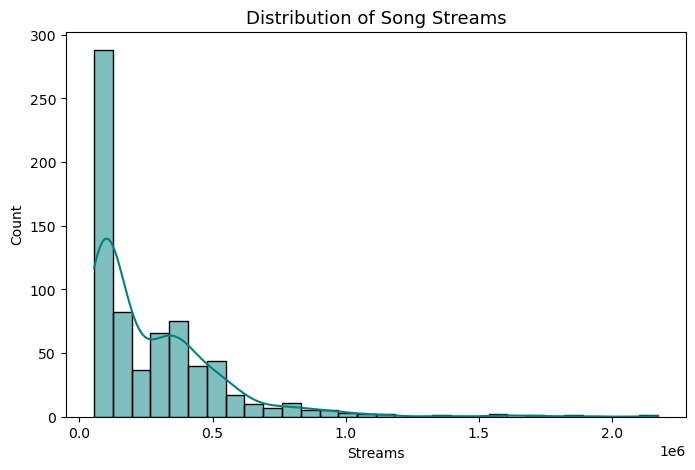

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(spotify_df['Streams_Int'], bins=30, kde=True, color='teal')
plt.title("Distribution of Song Streams", fontsize=13)
plt.xlabel("Streams")
plt.ylabel("Count")
plt.show()

## Insight: Reveals most songs have moderate streams; few become viral outliers.

## 2. Rank Distribution
### Shows how songs are distributed across ranks (1–100).

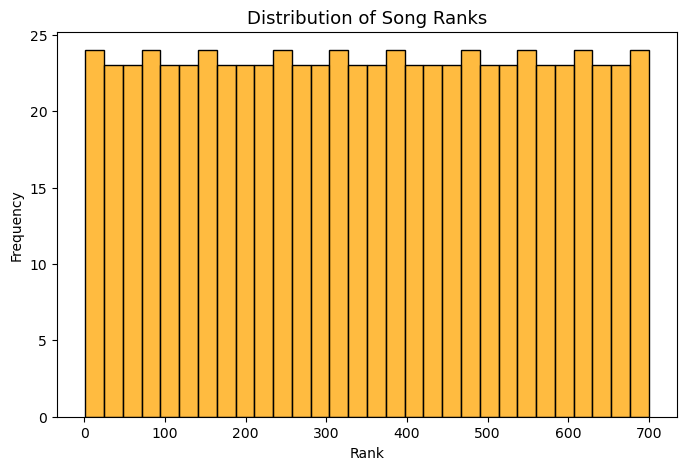

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(spotify_df['Rank'], bins=30, kde=False, color='orange')
plt.title("Distribution of Song Ranks", fontsize=13)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.show()

### Insight: Helps understand if rankings are evenly spread or clustered near top/bottom.

## 3. Boxplot of Streams

### Detects outliers and spread in stream counts.

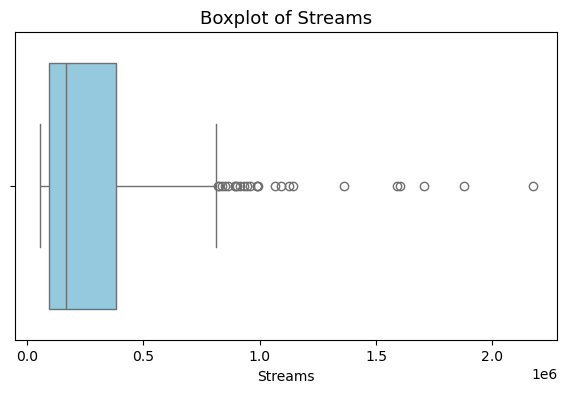

In [29]:
plt.figure(figsize=(7,4))
sns.boxplot(x=spotify_df['Streams_Int'], color='skyblue')
plt.title("Boxplot of Streams", fontsize=13)
plt.xlabel("Streams")
plt.show()

## Insight: Highlights top-streamed songs and potential outliers.

## 4. Average Streams per Country

### Shows average stream levels per country.

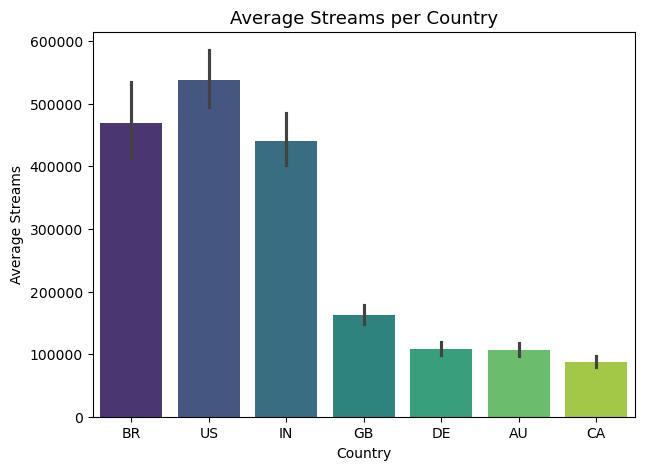

In [30]:
plt.figure(figsize=(7,5))
sns.barplot(x=spotify_df['Country'], y=spotify_df['Streams_Int'], estimator=np.mean, hue=spotify_df['Country'], legend=False, palette="viridis")
plt.title("Average Streams per Country", fontsize=13)
plt.xlabel("Country")
plt.ylabel("Average Streams")
plt.show()


## Insight: Helps compare audience sizes across countries.

# BIVARIATE ANALYSIS (Two Variables)

## Focus: Relationships between two columns.

#  1. Streams vs Rank

## Shows how rank affects total streams.

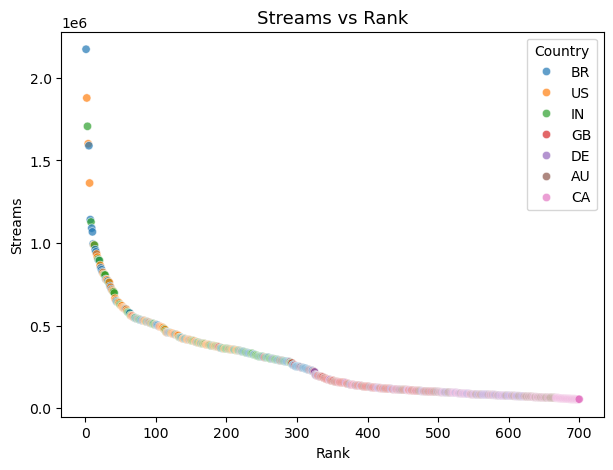

In [31]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Rank', y='Streams_Int', data=spotify_df, hue='Country', alpha=0.7)
plt.title("Streams vs Rank", fontsize=13)
plt.xlabel("Rank")
plt.ylabel("Streams")
plt.show()


## Insight: Negative relationship — higher ranks (lower number) → higher streams.

## 2. Days vs Streams
###  Shows how longer chart presence affects streams.

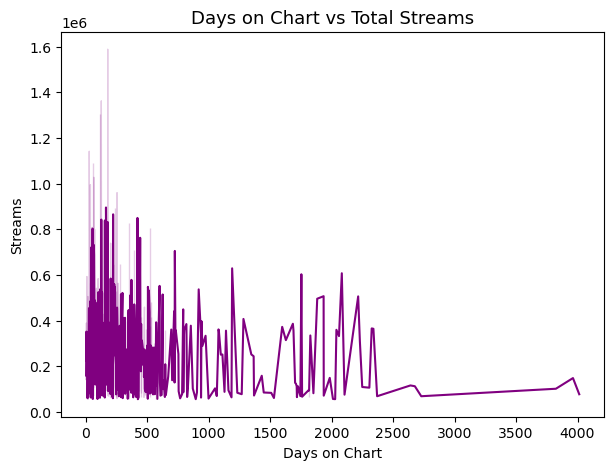

In [46]:
plt.figure(figsize=(7,5))
sns.lineplot(x='Days', y='Streams_Int', data=spotify_df, color='purple')
plt.title("Days on Chart vs Total Streams", fontsize=13)
plt.xlabel("Days on Chart")
plt.ylabel("Streams")
plt.show()

### Insight: Longer presence correlates with more cumulative streams.

## 3. Top Artists by Average Streams

### Top 10 artists with highest mean streams.

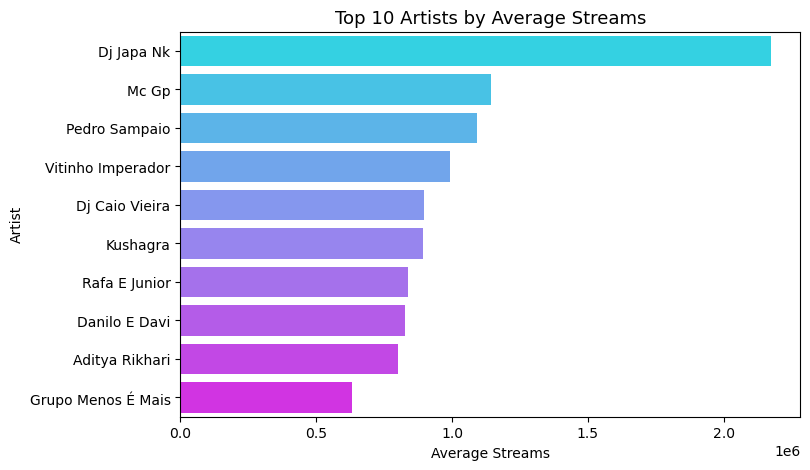

In [33]:
top_artists = spotify_df.groupby('Artist')['Streams_Int'].mean().nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.index, palette="cool", legend=False)
plt.title("Top 10 Artists by Average Streams", fontsize=13)
plt.xlabel("Average Streams")
plt.ylabel("Artist")
plt.show()

### Insight: Shows artists consistently performing well across charts.

## 4. Streams vs Country
### Comparison of stream distributions across countries.

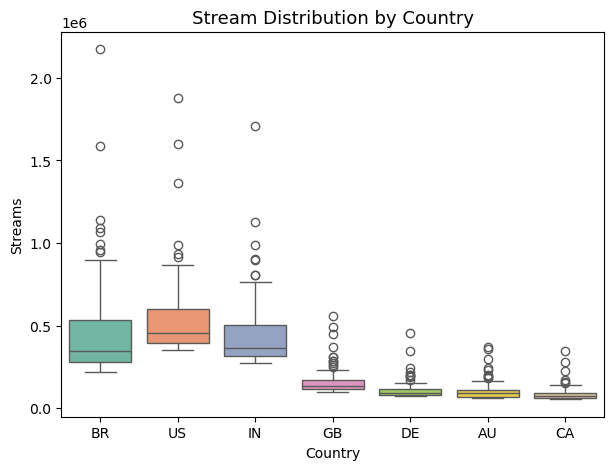

In [34]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Country', y='Streams_Int', data=spotify_df, hue='Country', palette="Set2", legend=False)
plt.title("Stream Distribution by Country", fontsize=13)
plt.xlabel("Country")
plt.ylabel("Streams")
plt.show()


## Insight: Helps visualize spread and variation of popularity by region.

## TRIVARIATE / MULTIVARIATE ANALYSIS

### Focus: Relationships involving 3 or more variables.

## 1. Streams vs Rank colored by Country

### Shows global pattern with color grouping.

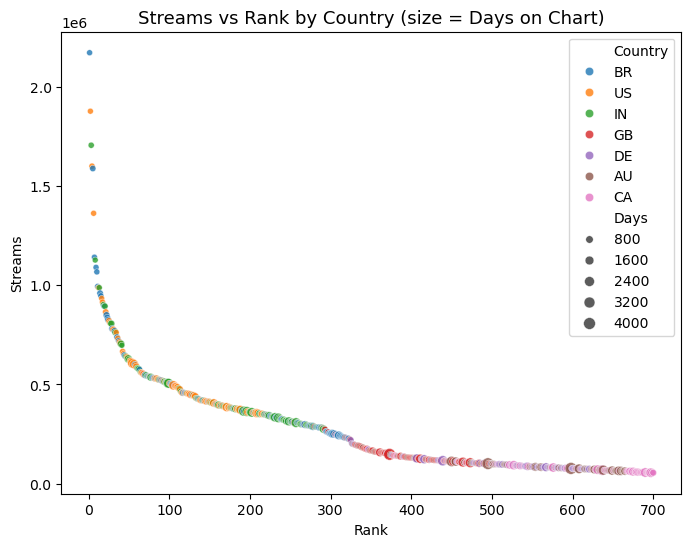

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Rank', y='Streams_Int', hue='Country', size='Days', data=spotify_df, alpha=0.8)
plt.title("Streams vs Rank by Country (size = Days on Chart)", fontsize=13)
plt.xlabel("Rank")
plt.ylabel("Streams")
plt.show()


## Insight: Adds a third dimension (Days) to analyze consistency by region.

## 2. Pairplot (Correlation Overview)

### Displays pairwise relationships across numeric columns.

In [44]:
spotify_df.columns

Index(['Rank', 'Song', 'Artist', 'Streams', 'Days', 'Country', 'Change',
       'Streams_Int'],
      dtype='object')

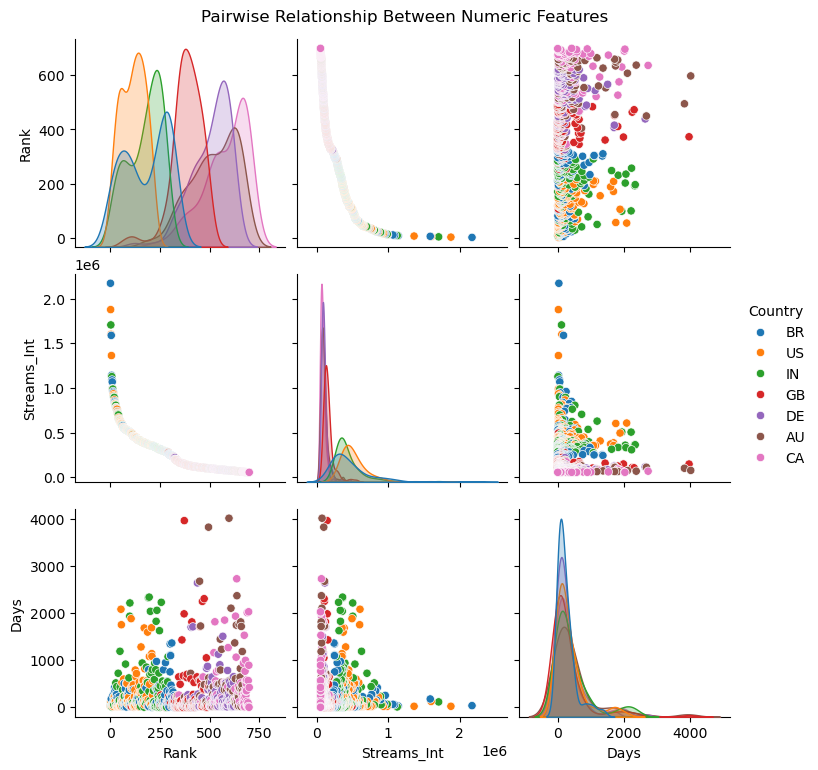

In [45]:
# Check if 'Country' exists before plotting
if 'Country' in spotify_df.columns:
    sns.pairplot(
        spotify_df[['Rank', 'Streams_Int', 'Days', 'Change', 'Country']],
        diag_kind='kde',
        hue='Country'
    )
plt.suptitle("Pairwise Relationship Between Numeric Features", y=1.02)
plt.show()

## Insight: Visually compares multiple numeric variable relationships at once.

## 3. Correlation Heatmap

### Numeric relationship strength between columns.

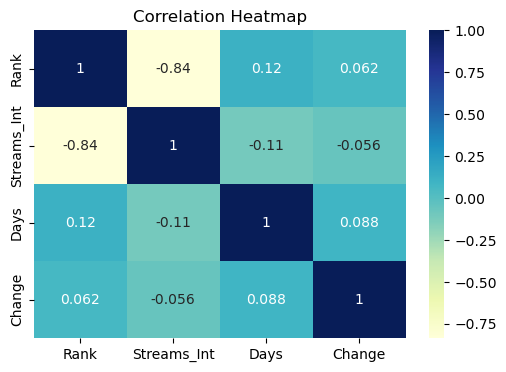

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(spotify_df[['Rank', 'Streams_Int', 'Days', 'Change']].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()


## Insight: Identifies how rank, days, and streams interrelate statistically.

## 4. Average Streams by Artist & Country

### Multivariate summary: both region and performer influence.

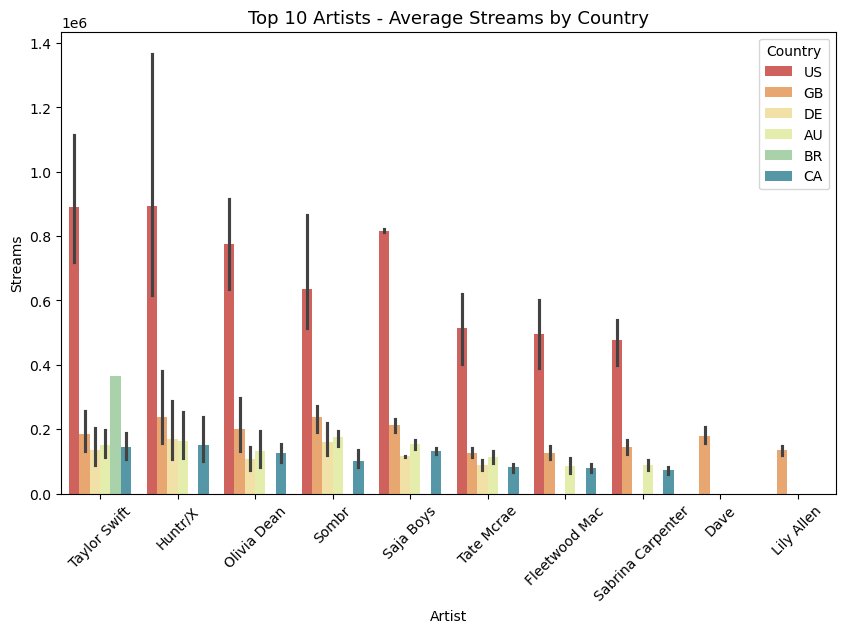

In [39]:
plt.figure(figsize=(10,6))
top10_artists = spotify_df['Artist'].value_counts().head(10).index
subset = spotify_df[spotify_df['Artist'].isin(top10_artists)]
sns.barplot(x='Artist', y='Streams_Int', hue='Country', data=subset, palette="Spectral")
plt.title("Top 10 Artists - Average Streams by Country", fontsize=13)
plt.xlabel("Artist")
plt.ylabel("Streams")
plt.xticks(rotation=45)
plt.show()


## Insight: Visualizes cross-country dominance of top artists.